In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
#Using "Adj Close" instead of "Close" allows for a more accurate analysis of historical stock prices by accounting for events such as dividends and stock splits, providing a better representation of returns and risks in portfolio analysis.

#Allianz SE price for last 5 years
alv_de = pd.read_csv('ALV.DE.csv', index_col='Date', usecols=['Date','Adj Close'])

#Mercedes-Benz Group AG  price for last 5 years
mbg_de = pd.read_csv('MBG.DE.csv', index_col='Date', usecols=['Date','Adj Close'])

#Siemens Aktiengesellschaft (SIE.DE) price for last 5 years
sie_de = pd.read_csv('SIE.DE.csv', index_col='Date', usecols=['Date','Adj Close'])

In [5]:
alv_de

,Adj Close
Date,
2018-06-08,138.452347
2018-06-11,140.313049
2018-06-12,140.452621
2018-06-13,139.692825
2018-06-14,141.925674
...,...
2023-06-01,NaN
2023-06-02,210.149994
2023-06-05,209.949997


In [6]:
mbg_de

,Adj Close
Date,
2018-06-08,45.959400
2018-06-11,45.558846
2018-06-12,46.219009
2018-06-13,45.788795
2018-06-14,46.871765
...,...
2023-06-01,NaN
2023-06-02,72.239998
2023-06-05,72.040001


In [7]:
sie_de

,Adj Close
Date,
2018-06-08,97.295570
2018-06-11,98.902908
2018-06-12,99.073898
2018-06-13,101.450722
2018-06-14,103.194855
...,...
2023-06-01,NaN
2023-06-02,159.279999
2023-06-05,158.520004


In [3]:
#They have the same length - we will join them in one pandas dataframe
adj_close_temp = pd.merge(alv_de, mbg_de, left_index = True, right_index = True)
adj_close_temp.rename(columns = {'Adj Close_x':'alv_de', 'Adj Close_y':'mbg_de'}, inplace = True)

In [4]:
adj_close_total = adj_close_temp.join(sie_de)
adj_close_total.rename(columns = {'Adj Close' : 'sie_de'}, inplace = 'True')

In [6]:
adj_close_total

,alv_de,mbg_de,sie_de
Date,,,
2018-06-08,138.452347,45.959400,97.295570
2018-06-11,140.313049,45.558846,98.902908
2018-06-12,140.452621,46.219009,99.073898
2018-06-13,139.692825,45.788795,101.450722
2018-06-14,141.925674,46.871765,103.194855
...,...,...,...
2023-06-01,NaN,NaN,NaN
2023-06-02,210.149994,72.239998,159.279999
2023-06-05,209.949997,72.040001,158.520004


In [5]:
#Looking for NaN values
nan_rows = adj_close_total[adj_close_total['alv_de'].isnull() | adj_close_total['mbg_de'].isnull() | adj_close_total['sie_de'].isnull()]

In [40]:
nan_rows

,alv_de,mbg_de,sie_de
Date,,,
2023-04-11,NaN,NaN,NaN
2023-05-23,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN


In [6]:
#Upon careful examination, we can determine that excluding those three dates from our analysis does not present any notable drawbacks, allowing us to proceed with our analysis seamlessly.
adj_close_total.dropna(inplace = True)

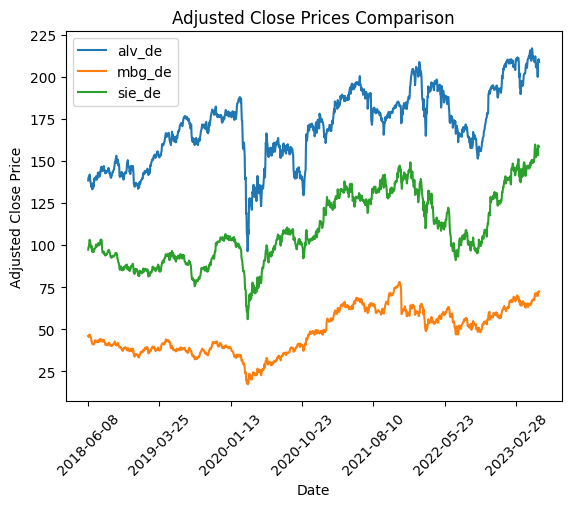

In [7]:
#Let's visualize the adjusted stock prices to conduct a visual analysis.
ax = adj_close_total.plot(y=['alv_de', 'mbg_de', 'sie_de'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices Comparison')
plt.legend(['alv_de', 'mbg_de', 'sie_de'])
plt.show()

We can observe a consistent pattern in the prices, which is expected since the selected stocks belong to the same country.

In [8]:
# Convert the index to DatetimeIndex type
adj_close_total.index = pd.to_datetime(adj_close_total.index)

# Calculate daily returns
daily_returns = adj_close_total.pct_change()

# Calculate expected daily return
expected_daily_return = daily_returns.mean()

# Calculate daily risk (standard deviation)
daily_risk = daily_returns.std()

# Calculate monthly returns
monthly_returns = adj_close_total.resample('M').ffill().pct_change()

# Calculate expected monthly return
expected_monthly_return = monthly_returns.mean()

# Calculate monthly risk (standard deviation)
monthly_risk = monthly_returns.std()

# Print the results
print("Expected Daily Return:")
print(expected_daily_return)
print("\nDaily Risk (Standard Deviation):")
print(daily_risk)
print("\nExpected Monthly Return:")
print(expected_monthly_return)
print("\nMonthly Risk (Standard Deviation):")
print(monthly_risk)


Expected Daily Return:
alv_de    0.000461
mbg_de    0.000646
sie_de    0.000563
dtype: float64

Daily Risk (Standard Deviation):
alv_de    0.016519
mbg_de    0.023942
sie_de    0.018817
dtype: float64

Expected Monthly Return:
alv_de    0.009729
mbg_de    0.014315
sie_de    0.011202
dtype: float64

Monthly Risk (Standard Deviation):
alv_de    0.075407
mbg_de    0.097257
sie_de    0.077090
dtype: float64


Since we are conducting medium-term analysis, we will utilize monthly returns for our portfolios, as it provides a suitable level of granularity over the chosen time period.

Minimum Variance Portfolio Weights:
alv_de: 0.53
mbg_de: 0.00
sie_de: 0.47


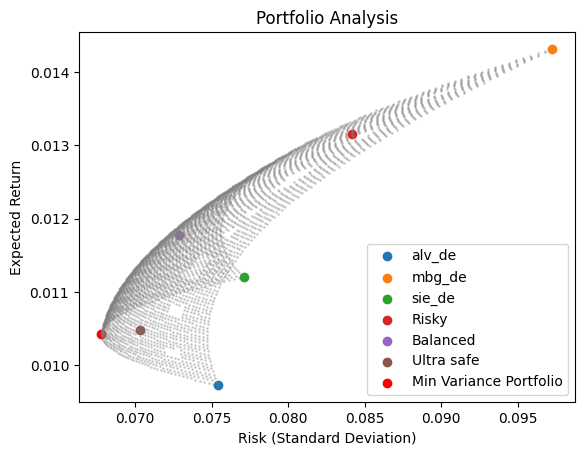

In [13]:
# Choose three portfolios with different risk levels (risky, balanced, safe)
# Assign weights to each stock in the portfolios, ensuring they sum up to 1
portfolio_weights = {
    'Risky': [0.15, 0.7, 0.15],      # Example weights for the risky portfolio
    'Balanced': [0.35, 0.35, 0.3],   # Example weights for the balanced portfolio
    'Ultra safe': [0.7, 0.1, 0.2]        # Example weights for the safe portfolio
}

# Calculate expected returns and risks for each portfolio
portfolio_returns = {}
portfolio_risks = {}

for portfolio, weights in portfolio_weights.items():
    # Calculate expected return for the portfolio
    expected_return = (weights * expected_monthly_return).sum()
    portfolio_returns[portfolio] = expected_return
    
    # Calculate risk (standard deviation) for the portfolio
    portfolio_risk = np.sqrt(np.dot(weights, np.dot(monthly_returns.cov(), weights)))
    portfolio_risks[portfolio] = portfolio_risk


# Plot all combinations of stocks and portfolios on a graph
for stock in monthly_risk.index:
    plt.scatter(monthly_risk[stock], expected_monthly_return[stock], label=stock)
for portfolio in portfolio_weights:
    plt.scatter(portfolio_risks[portfolio], portfolio_returns[portfolio], label=portfolio)

weights_combinations = np.arange(0, 1.01, 0.01)
weights_combinations = list(itertools.product(weights_combinations, repeat=3))
portfolio_risks_dot = []
portfolio_returns_dot = []
portfolio_weights_dot = []

for weights in weights_combinations:
    if sum(weights) == 1:
        portfolio_risk = np.sqrt(
            np.dot(weights, np.dot(monthly_returns.cov(), weights))
        )
        portfolio_return = np.dot(weights, expected_monthly_return)
        portfolio_risks_dot.append(portfolio_risk)
        portfolio_returns_dot.append(portfolio_return)
        portfolio_weights_dot.append(weights)

# Calculate the index of the minimum variance portfolio
min_variance_index = np.argmin(portfolio_risks_dot)

# Retrieve the risk and return values for the minimum variance portfolio
min_variance_risk = portfolio_risks_dot[min_variance_index]
min_variance_return = portfolio_returns_dot[min_variance_index]
min_variance_weights = portfolio_weights_dot[min_variance_index]

# Print the weights of the minimum variance portfolio
print("Minimum Variance Portfolio Weights:")
for stock, weight in zip(monthly_returns.columns, min_variance_weights):
    print(stock + ": " + "{:.2f}".format(weight))

plt.scatter(min_variance_risk, min_variance_return, c='red', label='Min Variance Portfolio')
plt.scatter(portfolio_risks_dot, portfolio_returns_dot, c='grey', alpha=0.3, s=1)
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Portfolio Analysis')
plt.legend()
plt.show()
